# Rayleigh-Taylor instability

In this non-dimensionalization, the domain's extent is $\mathcal{O}(1)$. Refer to `demo/md/navier_stokes_non_dimensionalization.md` for details.

initial-boundary value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\frac{\partial c}{\partial t} + \textbf{u}\cdot\nabla c = \nabla^2 c$$

$$\nabla\cdot\textbf{u}=0$$

$$\frac{1}{Pr}\left(\frac{\partial\textbf{u}}{\partial t}+\textbf{u}\cdot\nabla\textbf{u}\right)=-\nabla p + \nabla^2\textbf{u} + Ra\rho(c)\,\textbf{e}_g$$

constitutive relation

$$\rho(c,\theta) = Ra\,c $$

initial conditions

$$c(\textbf{x},t=0)=c_0(\textbf{x})$$

$$\textbf{u}(\textbf{x},t=0)=\textbf{u}_0(\textbf{x})$$

$$p(\textbf{x},t=0)=p_0(\textbf{x})$$

Dirichlet boundary condition on $\textbf{x}\in\partial\Omega_{\text{D}}$

$$c = c_{\text{D}}$$

Neumann boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{D}}$

$$\textbf{n}\cdot\nabla c = c_{\text{N}}$$

essential boundary condition on $\textbf{x}\in\partial\Omega_E$

$$\textbf{n}\cdot\textbf{u} = u_{\text{E}}$$

natural boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{E}}$

$$\sigma\cdot\textbf{n} = \boldsymbol{\sigma}_{\text{N}}$$

mapping to Navier-Stokes equations defined in `demo/py/navier_stokes_double_diffusive.py`

$$
\begin{Bmatrix}
\rho \\
\mu \\
\textbf{f} \\
\end{Bmatrix}
\mapsto
\begin{Bmatrix}
\frac{1}{Pr} \\ 
1 \\
\rho\,\textbf{e}_g
\end{Bmatrix}
$$

## Example: $d=2$ rectangle

$$\Omega = [0, L_x] \times [0, L_y]$$

$$\textbf{e}_g=-\textbf{e}_y$$

$$\textbf{u}_0=\textbf{0}$$

$$c_0(x, y)=\text{H}(y-\tfrac{1}{2}L_y)+\mathcal{N}(x,y)$$

$$(\textbf{n}\cdot\nabla c)\vert_{\partial\Omega}=0$$

$$\textbf{u}\vert_{\partial\Omega}=\textbf{0}$$

In [10]:
from lucifex.sim import integrate
from lucifex.viz import plot_colormap
from lucifex.io import write

from py.navier_stokes_rayleigh_taylor import navier_stokes_rayleigh_taylor_rectangle


Ra = 1e5
simulation = navier_stokes_rayleigh_taylor_rectangle(
    Lx=2.0,
    Ly=1.0,    
    Nx=64,
    Ny=64,
    cell='quadrilateral',
    Ra=Ra,
    dt_max=0.01, 
)

n_stop = 200
dt_init = 1e-6
n_init = 10
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

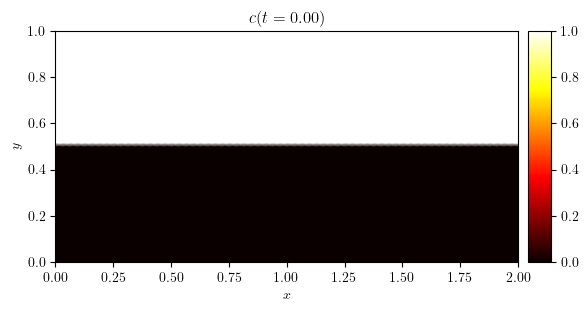

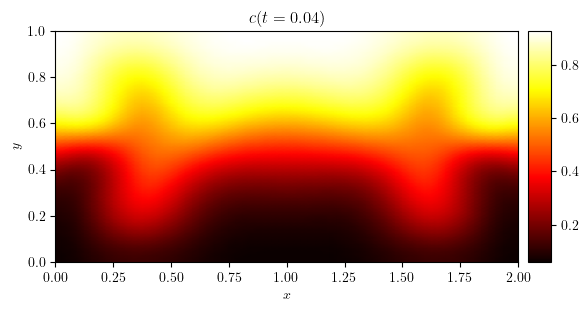

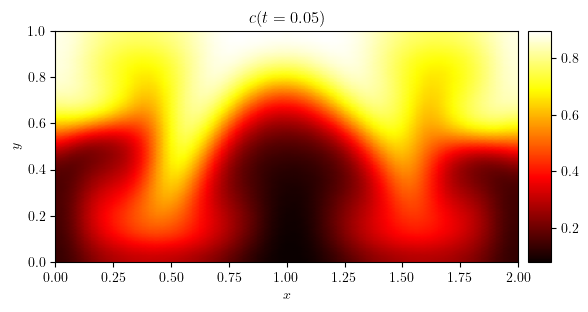

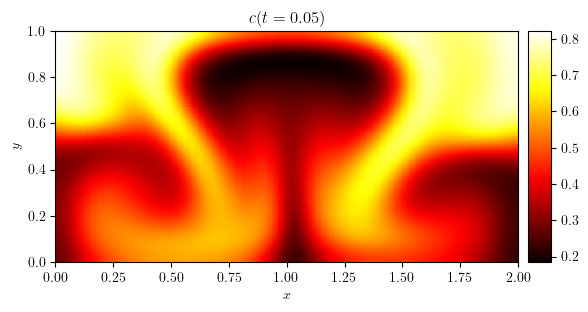

: 

In [ ]:
c = simulation['c']
mesh = c.mesh

i_qrt = int(0.25 * len(c.series))
i_mid = int(0.5 * len(c.series))
time_indices = (0, i_qrt, i_mid,  -1)
for i in time_indices:
    t = c.time_series[i]
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={t:.2f})$')
    write(fig, f'A18_rayleigh_taylor_c(t={t:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)